# Car Insurance Regression Project Part 1

### 1. Objective and Techniques:

We will be predicting Customer Lifetime Value by the help of available columns. For this we will be using the following regression techniques:

- KNN repressor 
- Linear regression
- Ridge, Lasso, and polynomial regression 
- SVM both simple and with kernels (rbf, poly, linear)
- Decison Tree Regressor

### 2. Dataset Description:

- State: 5 states= **Arizona, California, Nevada, Oregon, Washington**
- Customer Lifetime Value (CLV): Total Premium Collected till date - Total Claim (***Target Column***)
- Response: *We will be dropping this column*
- Coverage Type: 3 Types = **Basic, Extended, Premium**
- Education Level: **High School or Below, College, Bachelor, Master, Doctor**(Ordinal Variable)
- Effective to Date: (*This column will be dropped*)
- EmploymentStatus: 5 types = **Unemployed, Disabled, Medical Leave, Employeed, Retired**
- Gender: *Male or Female*
- Income: Dollars Earned
- Location: *Location type of the client* = **Rural, Suburban, Urban**
- Marital Status: **Single, Divorced, Married**
- Monthly Premium Auto: *Monthly insurance premium*
- Months Since Last Claim: *Number of months since the last claim*
- Months Since Policy Inception: *How old is the policy?*
- Number of Open Complaints: *Open cases*
- Number of Policy: *Total number of policy bought*
- Policy Type: **Corporate, Personal, Special**
- Policy: *Each Policy type has 3 sub-categories*
- Renew Offer: *Four offer types*
- Total Claim Amount: *Expenses beared by the company*
- Vehicle Class: **Four Door Car, Luxury Car, Luxury SUV, Sports Car, SUV, Two Door Car**
- Vehicle Size: *Three vehicle sizes = **Small, Medsize, Large**

Type Of Variables  

| Type of Variable | Number of Variable |
| ------ | ------ |
| Numerical | 8 |
| Categorical | 11 |
| Ordinal | 3 |
| Date and Time | 1 |
| Unique ID | 1 |
| **Total Columns** | 24 |

**NOTE: Initially this dataset does not include missing values, we will be adding missing values**

### 3. Approach:
- Importing the Required Libraries
- Adding the missing values (as data does not contain any)
- Exploratory Data Analysis
- Finding the Best features for CLV prediction
- Selecting the best algorithm

### Libraries Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data Import

In [2]:
df = pd.read_csv('car_insurance_19.csv')
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/2011,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.38,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/2011,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.60,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/2011,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.03,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/2011,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.20,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/2011,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.53,Four-Door Car,Medsize


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [4]:
print ("Total Number of Rows:\n", df.shape[0])
print ("Total Number of Columns:\n", df.shape[1])

Total Number of Rows:
 9134
Total Number of Columns:
 24


In [5]:
#Randomly added missing values in columns
cols = [1, 4, 5, 8, 9, 13, 15, 18, 21, 22]
np.random.seed(0)
masking_array = np.random.randint(100, size = (df.shape[0], 10)) < 90
df[df.columns[cols]] = df[df.columns[cols]].where(masking_array, np.nan)

In [6]:
print("Null values in Each Column :\n", df.isnull().sum())

Null values in Each Column :
 Customer                           0
State                            904
Customer Lifetime Value            0
Response                           0
Coverage                         898
Education                        972
Effective To Date                  0
EmploymentStatus                   0
Gender                           906
Income                           949
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          942
Months Since Policy Inception      0
Number of Open Complaints        885
Number of Policies                 0
Policy Type                        0
Policy                           918
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount               882
Vehicle Class                    884
Vehicle Size                       0
dtype: int64


**We will be dropping the following columns:**
- Customer
- Response
- Effective to Date

**We have missing values in the following columns:**
- State, Coverage, Education, Gender, Income, Months Since Last Claim, Number of Open Complaints, Policy, Total Claim Amount, Vehicle Class

In [7]:
df.drop("Customer", axis = 1, inplace = True)
df.drop("Response", axis = 1, inplace = True)
df.drop("Effective To Date", axis = 1, inplace = True)

In [8]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,8185.000000,9134.000000,8192.000000,9134.000000,8249.000000,9134.000000,8252.000000
mean,8004.940475,37568.899939,93.219291,15.106079,48.064594,0.382471,2.966170,432.443791
std,6870.967608,30249.533167,34.407967,10.057622,27.905991,0.906538,2.390182,288.528395
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.100000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,268.470000
50%,5780.182197,34087.000000,83.000000,14.000000,48.000000,0.000000,2.000000,382.080000
75%,8962.167041,62007.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.240000


It looks like we have some outliers as 75% of the values in the ```Customer Lifetime Value``` are closer to the mean, it is highly skewed therefore top 2% of the data will be removed.

AxesSubplot(0.125,0.125;0.775x0.755)


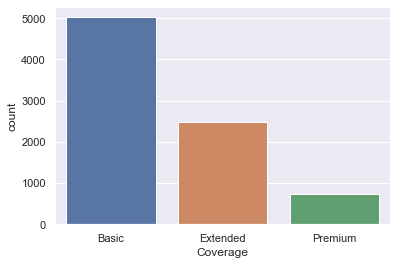

In [9]:
print(sns.countplot(x = df['Coverage']))
# It is clear from the plot that people enroll for Basic Coverage more than any other coverage; 
# therefore we will be imputing Basic in place of np.NaN values 

In [10]:
df['Coverage'].replace({np.nan: 'Basic'}, inplace = True)

AxesSubplot(0.125,0.125;0.775x0.755)


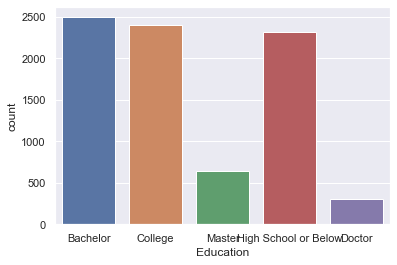

In [11]:
print(sns.countplot(x = df['Education']))
#Highest number of clients have completed Bachelors; missing values will be replaced with Bachelor

In [12]:
df['Education'].replace({np.nan: 'Bachelor'}, inplace = True)

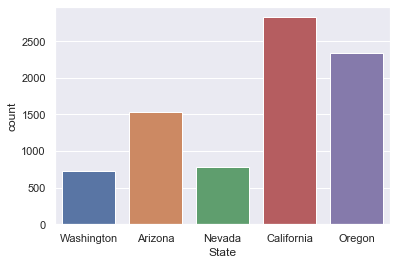

In [13]:
sns.countplot(x = 'State', data = df)

In [14]:
df['State'].replace({np.nan: 'California'}, inplace = True)

AxesSubplot(0.125,0.125;0.775x0.755)


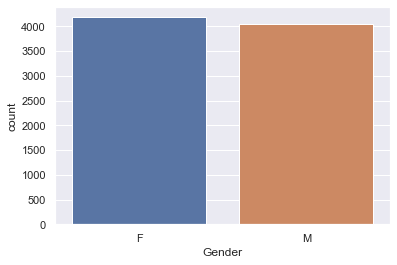

In [15]:
print(sns.countplot(x = "Gender", data=df))


In [16]:
#We have More females compared to males as our customers; Therefore we will replace np.nan with Female
df['Gender'].replace({np.nan: 'F'}, inplace = True)

In [17]:
#Employment and educational has a significant effect on income. We will be filling blank values with median income for 
# each employment category
df['Income'] = df['Income'].fillna(df.groupby('EmploymentStatus')['Income'].transform('median')).astype(int)

**Mean value to replace null in ```Months Since Last Claim``` column**

In [18]:
df['Months Since Last Claim'].replace({np.nan: df['Months Since Last Claim'].mean()}, inplace =True)

**Since variable ```Number of Open Complaints``` is skewed; median value will be used to replace missing value**

In [19]:
df['Number of Open Complaints'].replace({np.nan: df['Number of Open Complaints'].median()}, inplace = True)

**Missing values in ```Policy``` column**

Since ```Policy``` share a relation with ```Policy Type``` column. Therefore for each ```Policy Type``` whichever ```Policy``` has the highes frequency we will replace it with it.

In [20]:
dict = df.groupby(['Policy Type'])['Policy'].agg(pd.Series.mode)
dict    

Policy Type
Corporate Auto    Corporate L3
Personal Auto      Personal L3
Special Auto        Special L2
Name: Policy, dtype: object

In [21]:
df['Policy'] = df['Policy'].fillna(df['Policy Type'].apply(lambda x: dict.get(x)))
df['Policy'].value_counts()

Personal L3     3799
Personal L2     1880
Personal L1     1109
Corporate L3    1090
Corporate L2     551
Corporate L1     327
Special L2       177
Special L3       138
Special L1        63
Name: Policy, dtype: int64

**Missing values in the column ```Total Claim Amount```**

In [22]:
df['Total Claim Amount'].describe()

count    8252.000000
mean      432.443791
std       288.528395
min         0.100000
25%       268.470000
50%       382.080000
75%       547.200000
max      2893.240000
Name: Total Claim Amount, dtype: float64

From the distribution of ```Total Claim Amount``` it looks like the values are skewed and it would be a wise choice to use **median** to replace the null values.

In [23]:
df['Total Claim Amount'].replace({np.nan: df['Total Claim Amount'].median()}, inplace = True)

**Missing values in ```Vehicle Class```**

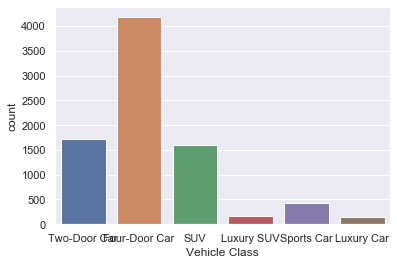

In [24]:
sns.countplot(x = 'Vehicle Class', data = df)

Most people prefer Four-Door Car over any other type of vehicle. Hence, we will be replace np.nan/Null withn **Four-Door Car**.

In [25]:
df['Vehicle Class'].replace({np.nan: 'Four-Door Car'}, inplace = True)

### Outlier Check

In [26]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

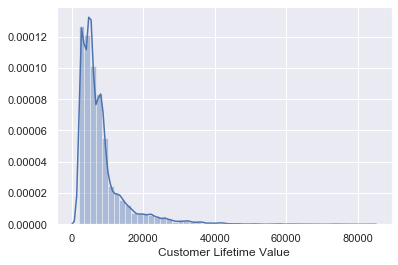

In [27]:
sns.distplot(df['Customer Lifetime Value'])

It is clear from plot and values from describe that the top values very far away from the mean. There for to make it normal we will remove top 1% of the data from the dataset

In [28]:
q = df['Customer Lifetime Value'].quantile(.99)
df = df[df['Customer Lifetime Value']<q]
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9042.000000,9042.00000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000
mean,7627.389068,37502.50188,92.628511,15.096290,47.970029,0.344835,2.976001,424.804266
std,5708.440930,29718.48485,33.770983,9.510452,27.916222,0.869470,2.400314,270.737637
min,1898.007675,0.00000,61.000000,0.000000,0.000000,0.000000,1.000000,0.100000
25%,3964.751299,0.00000,68.000000,7.000000,24.000000,0.000000,1.000000,292.800000
50%,5741.711754,35482.00000,82.000000,15.106079,48.000000,0.000000,2.000000,382.080000
75%,8837.897887,58836.25000,109.000000,22.000000,71.000000,0.000000,4.000000,525.600000
max,35944.710480,99981.00000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.240000


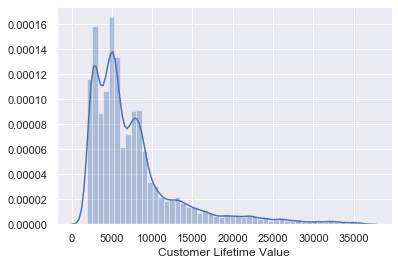

In [29]:
sns.distplot(df['Customer Lifetime Value'])

Now the values looks much more spread out compared to the earlier plot.

## Preprocessing

**For the following features we will create one-hot vector**:
- State
- Coverage
- EmploymentStatus
- Location Code
- Marital Status
- Policy Type
- Policy
- Renew Offer Type
- Sales Channel
- Vehicle Class
- Vehicle Size

**For the following features we will map the values or order them:**
- Gender
- Education

### One Hot Vectors and Dropping Base Variable

In [30]:
dummy = ['State', 'Coverage', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type',
         'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

for d in dummy:   
    cols = pd.get_dummies(df[d], prefix= d)
    df[cols.columns] = cols
df.head(5)

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,Washington,2763.519279,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,0,0,0,0,0,0,1,0,1,0
1,Arizona,6979.535903,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,0,1,0,0,0,0,0,0,1,0
2,Nevada,12887.431650,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,0,0,0,0,0,0,1,0,1,0
3,California,7645.861827,Basic,Bachelor,Unemployed,F,0,Suburban,Married,106,...,0,0,0,0,1,0,0,0,1,0
4,Washington,2813.692575,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,0,1,0,0,0,0,0,0,1,0


In [31]:
for d in dummy:
    df.drop(d, axis=1, inplace=True)

### Mapping Values:

In [32]:
df['Education'].value_counts()

Bachelor                3436
College                 2367
High School or Below    2296
Master                   636
Doctor                   307
Name: Education, dtype: int64

In [33]:
df['Gender'].replace({"F": 1, "M": 0}, inplace = True)
df['Education'].replace({"High School or Below": 0, "College": 1, "Bachelor": 2, "Master": 3, "Doctor": 4}, 
                            inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9042 entries, 0 to 9133
Data columns (total 58 columns):
Customer Lifetime Value           9042 non-null float64
Education                         9042 non-null int64
Gender                            9042 non-null int64
Income                            9042 non-null int32
Monthly Premium Auto              9042 non-null int64
Months Since Last Claim           9042 non-null float64
Months Since Policy Inception     9042 non-null int64
Number of Open Complaints         9042 non-null float64
Number of Policies                9042 non-null int64
Total Claim Amount                9042 non-null float64
State_Arizona                     9042 non-null uint8
State_California                  9042 non-null uint8
State_Nevada                      9042 non-null uint8
State_Oregon                      9042 non-null uint8
State_Washington                  9042 non-null uint8
Coverage_Basic                    9042 non-null uint8
Coverage_Extended    

#### X and Y variable and Train-Test Split
*Note: random_state = 0 will be used*

In [62]:
X = df.drop('Customer Lifetime Value', axis=1)
y = df['Customer Lifetime Value']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size = 0.30) #Splitting the df

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size = 0.2) #Regressor for which GridSearch is no applicable
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

For algorithms with no hyper-parameters we will be using train_val and val to train and test

## LinearRegression Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


lreg = LinearRegression()
model = lreg.fit(X_train_val, y_train_val)
print('Train Score: ', lreg.score(X_train_val, y_train_val))
print('Validation Score: ', lreg.score(X_val, y_val))

Train Score:  0.14896390321509956
Validation Score:  0.12393199015657853


## Ridge with Grid Search

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1]}

ridge_gs = GridSearchCV(Ridge(), param_grid, cv = 5,return_train_score=1)
ridge_gs.fit(X_train,  y_train)
print(ridge_gs.best_params_)
print(ridge_gs.best_score_)
print(ridge_gs.scorer_)

{'alpha': 0.1}
0.13008802570568195
<function _passthrough_scorer at 0x00000151A0FD2288>


## Lasso with GridSearchCV

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.00001,0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

lasso_gs = GridSearchCV(Lasso(), param_grid, cv = 5,return_train_score=1)
lasso_gs.fit(X_train,  y_train)
print(lasso_gs.best_params_)
print(lasso_gs.best_score_)
print(lasso_gs.scorer_)

C:\Users\paawa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5886031969.543213, tolerance: 16266568.36205727
  positive)
C:\Users\paawa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11612667383.094254, tolerance: 16684132.982697554
  positive)
C:\Users\paawa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5820793610.771606, tolerance: 16347697.520777967
  positive)
C:\Users\paawa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

{'alpha': 10}
0.13275019323297668
<function _passthrough_scorer at 0x00000151A0FD2288>


## LinearRegression with Polynomial Features

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_val)
X_test_poly = poly.transform(X_val)

In [41]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_val)

print('Train Score: \n',poly_reg.score(X_train_poly, y_train_val))
print('Validation Score: \n', poly_reg.score(X_test_poly, y_val)) 

Train Score: 
 0.40556022587583973
Validation Score: 
 -0.007006659538145055


### Simple SVM or LinearSVM

In [42]:
from sklearn.svm import LinearSVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'epsilon': [0.0001 ,0.001, 0.01, 0.1, 1]}

linearSVR_gs = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=1)
linearSVR_gs.fit(X_train,  y_train)
print(linearSVR_gs.best_params_)
print(linearSVR_gs.best_score_)
print(linearSVR_gs.scorer_)

{'C': 10, 'epsilon': 1}
-0.01365926832944473
<function _passthrough_scorer at 0x00000151A0FD2288>


### SVR With ```rbf```

In [43]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
             'epsilon': [0.01, 0.1, 1]}

svr_rbf = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv = 5,return_train_score=1)
svr_rbf.fit(X_train,  y_train)
print(svr_rbf.best_params_)
print(svr_rbf.best_score_)
print(svr_rbf.scorer_)

{'C': 100, 'epsilon': 1, 'gamma': 0.1}
0.004575433335914586
<function _passthrough_scorer at 0x00000151A0FD2288>


### SVR with ```poly```

In [44]:
#SVR with kernel poly is computationaly costly process and it may take more than 15 hrs to give us 
#the results based on the dataset we are using
#We will be using subset of the data with 1000 instances to select the best hyperparameters and then build the model

df_sub = df.sample(frac = 0.15, random_state = 42)
X_sub = df_sub.drop('Customer Lifetime Value', axis =1)
y_sub = df_sub['Customer Lifetime Value']


from sklearn.preprocessing import MinMaxScaler

X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub, y_sub,random_state=0, test_size = 0.3) #Splitting the df

scaler = MinMaxScaler()

X_sub_train = scaler.fit_transform(X_sub_train)
X_sub_test = scaler.transform(X_sub_test)

In [45]:
# Initial SVR_poly regression to get the best hyper-parameter

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
             'epsilon': [0.001, 0.01, 0.1, 1]}

svr_poly = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv = 5,return_train_score=1)
svr_poly.fit(X_sub_train,  y_sub_train)
print(svr_poly.best_params_)
print(svr_poly.best_score_)
print(svr_poly.scorer_)

{'C': 0.001, 'epsilon': 0.001, 'gamma': 10}
-0.003219932889364501
<function _passthrough_scorer at 0x00000151A0FD2288>


C:\Users\paawa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Hyper-parameter values: {C: 100, epsilon: 1, gamma: 0.1} turns out to be the best for validation set** \
**Therefore we will build a model with those parameters**

In [46]:
param_grid = {'C': [0.001], 'epsilon': [0.001], 'gamma': [10]}

final_svr_poly = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv = 5,return_train_score=1)
final_svr_poly.fit(X_train,  y_train)
print(final_svr_poly.best_params_)
print(final_svr_poly.best_score_)
print(final_svr_poly.scorer_)

{'C': 0.001, 'epsilon': 0.001, 'gamma': 10}
0.03050314622200572
<function _passthrough_scorer at 0x00000151A0FD2288>


### SVR with ```linear``` Kernel

In [47]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
             'epsilon': [0.001, 0.01, 0.1, 1]}

svr_linear = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv = 5,return_train_score=1)
svr_linear.fit(X_train,  y_train)
print(svr_linear.best_params_)
print(svr_linear.best_score_)
print(svr_linear.scorer_)

{'C': 10, 'epsilon': 1, 'gamma': 0.001}
0.012394924404351512
<function _passthrough_scorer at 0x00000151A0FD2288>


### Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_leaf_nodes': [2, 5, 10, 25, 50]}

dtr_gs = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5)

dtr_gs.fit(X_train, y_train)

print(dtr_gs.best_params_)
print(dtr_gs.best_score_)
print(dtr_gs.scorer_)

{'max_leaf_nodes': 10}
0.6819060396809384
<function _passthrough_scorer at 0x00000151A0FD2288>


### KnnRegressor with GridSearchCV

In [49]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

knn_gs = GridSearchCV(KNeighborsRegressor(),param_grid, cv=5)
knn_gs.fit(X_train, y_train)

print(knn_gs.best_params_)
print(knn_gs.best_score_)
print(knn_gs.scorer_)

{'n_neighbors': 11, 'weights': 'distance'}
0.05309732790890951
<function _passthrough_scorer at 0x00000151A0FD2288>


### SGD Regressor 

In [50]:
from sklearn.linear_model import SGDRegressor

param_grid = {'eta0': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'max_iter': [1000, 5000, 10000, 50000, 100000]}
sgd_gs = GridSearchCV(SGDRegressor(random_state= 0, learning_rate = 'constant'), param_grid, cv=5, return_train_score=1)
sgd_gs.fit(X_train, y_train)
print(sgd_gs.best_params_)
print(sgd_gs.best_score_)
print(sgd_gs.scorer_)

{'eta0': 0.0001, 'max_iter': 1000}
0.12352222925661514
<function _passthrough_scorer at 0x00000151A0FD2288>


## Results

In [51]:
dict = {'Models': ['KnnRegressor', 'LinearRegression', 'Ridge', 'Lasso', 'PolynomialRegression', 'LinearSVR', 'SVR_rbf', 'SVR_poly', 'SVR_linear', 'DecisionTreeRegressor', 'SGDRegressor'],
    'Mean Validation Score': [knn_gs.best_score_, lreg.score(X_val, y_val), ridge_gs.best_score_, lasso_gs.best_score_, poly_reg.score(X_test_poly, y_val),linearSVR_gs.best_score_,svr_rbf.best_score_, svr_poly.best_score_, svr_linear.best_score_, dtr_gs.best_score_, sgd_gs.best_score_]}

In [52]:
regression_result = pd.DataFrame(dict)
regression_result

,Models,Mean Validation Score
0,KnnRegressor,0.053097
1,LinearRegression,0.123932
2,Ridge,0.130088
3,Lasso,0.132750
4,PolynomialRegression,-0.007007
5,LinearSVR,-0.013659
6,SVR_rbf,0.004575
7,SVR_poly,-0.003220
8,SVR_linear,0.012395
9,DecisionTreeRegressor,0.681906


From the table it is evident that **DecisionTreeRegressor** has the highest validation sscore \
\
We'll be moving ahead with **DecisionTreeRegressor** and build the model and test it on the actual testing data

## Final Model

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
final_model = DecisionTreeRegressor(max_leaf_nodes = 10, random_state=0)
final_model.fit(X_train, y_train)
print('Decision Tree Regression Train Score: \n', final_model.score(X_train, y_train))
print('Decision Tree Regression Test Score: \n', final_model.score(X_test, y_test))

Decision Tree Regression Train Score: 
 0.693664816200909
Decision Tree Regression Test Score: 
 0.7052980745260897


**Predicting values of Y and comparing it with Actual Values of Y**

In [55]:
y_predict = final_model.predict(X_test)

In [70]:
dict = {'y_actual': y_test, 'y_predict': y_predict}

In [71]:
prediction = pd.DataFrame(dict)

In [75]:
prediction['residual'] = abs(prediction['y_actual'] - prediction['y_predict'])

In [76]:
prediction.head(10)

,y_actual,y_predict,residual
5509,7600.443798,8766.506164,1166.062366
6929,2588.435037,2992.253923,403.818886
156,3517.385764,2992.253923,525.131841
6987,5505.167392,5648.850997,143.683605
2548,2700.985899,2992.253923,291.268024
1833,3788.649817,2992.253923,796.395894
3711,10369.387400,11146.095639,776.708239
4668,4117.372390,4720.504855,603.132465
7657,26453.935120,12995.051751,13458.883369
123,15023.598580,15122.387080,98.788500
